# 시계열 분석의 기본 개념

* 시계열 분석은 단일 또는 다변 수치 값으로 자기회귀하여 데이터의 트랜드와 반복패턴을 찾아 예측하는 분석 기법
* 자기회귀(Autoregression)는 이전 시간 단계의 관측값을 입력으로 사용하여 회귀 방정식을 구성하여 다음 시간 단계의 값을 예측하는   
  시계열 모델입니다.

# 데이터 로드

* 한국부동산원_전국주택가격동향조사_월별동향_아파트_매매가격(평균매매가격)_20240630(단위: 천원)

In [55]:
import pandas as pd

# Load the dataset from the CSV file using pandas
df = pd.read_csv("20240630.csv", encoding='cp949')

In [56]:
df.head()

,지역,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,...,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06
0,전국,264474.0,264035.0,263470.0,262630.0,261823.0,260425.0,258959.0,257163.0,255680.0,...,447695.0,449561.0,450090.0,449530.0,452117.0,451135.0,450506.0,450577.0,450932.0,452330.0
1,수도권,365249.0,364275.0,362790.0,360918.0,359253.0,356737.0,354214.0,350990.0,348174.0,...,661799.0,665193.0,666233.0,665377.0,665914.0,664644.0,664048.0,664664.0,665731.0,669144.0
2,지방권,163394.0,163491.0,163849.0,164044.0,164096.0,163820.0,163416.0,163052.0,162905.0,...,254477.0,254964.0,255032.0,254740.0,258322.0,257601.0,256943.0,256520.0,256231.0,255802.0
3,6대광역시,195186.0,194989.0,195093.0,195037.0,194851.0,194273.0,193523.0,192675.0,192214.0,...,333817.0,334515.0,334401.0,333839.0,338308.0,337439.0,336710.0,336410.0,336213.0,335812.0
4,5대광역시,190421.0,190312.0,190555.0,190603.0,190631.0,190183.0,189587.0,188896.0,188635.0,...,325523.0,326057.0,325957.0,325465.0,329757.0,328758.0,327864.0,327370.0,326899.0,326018.0


In [57]:
df= df.transpose() # 열과 행 자리바꿈
# df

In [58]:
df= df.rename(columns=df.iloc[0]) # 인덱스행 제거를 위한 이름바꿈
# df

In [59]:
df= df.drop(df.index[0]) # 인덱스행 제거
# df

In [60]:
df= df.iloc[:, :1] # 전국 아파트 매매가격열만 남김
df

,전국
2012-01,264474.0
2012-02,264035.0
2012-03,263470.0
2012-04,262630.0
2012-05,261823.0
...,...
2024-02,451135.0
2024-03,450506.0
2024-04,450577.0
2024-05,450932.0


In [61]:
df= df.reset_index() # 날짜열을 인덱스열이 아닌 데이터로 쓰려고 인덱스열 재정의
df

,index,전국
0,2012-01,264474.0
1,2012-02,264035.0
2,2012-03,263470.0
3,2012-04,262630.0
4,2012-05,261823.0
...,...,...
145,2024-02,451135.0
146,2024-03,450506.0
147,2024-04,450577.0
148,2024-05,450932.0


In [62]:
df.columns=['ds','y']
df

,ds,y
0,2012-01,264474.0
1,2012-02,264035.0
2,2012-03,263470.0
3,2012-04,262630.0
4,2012-05,261823.0
...,...,...
145,2024-02,451135.0
146,2024-03,450506.0
147,2024-04,450577.0
148,2024-05,450932.0


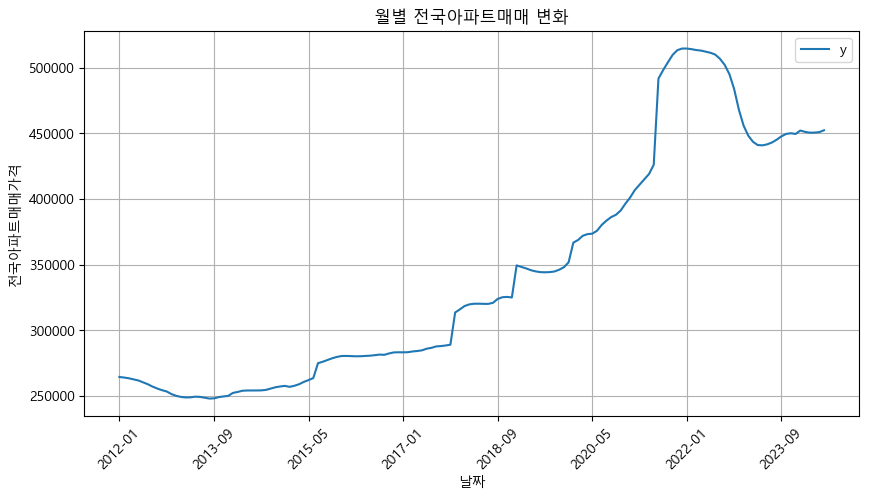

In [63]:
# Plot the dataset, showing price (y column) over time (ds column)
# plt = df.plot(x="ds", y="y", figsize=(15, 5))

import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
# 한글 폰트
font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
# CSV 파일 로드
# 판다스 내장 plot 함수를 사용하여 바로 차트 그리기
df.plot(x='ds', y='y', figsize=(10, 5), legend=True, title='월별 전국아파트매매 변화', grid=True, rot=45)
plt.xlabel('날짜')
plt.ylabel('전국아파트매매가격')
plt.show()


* 시계열 열은 "ds"로 이름 지어져야 하며 날짜 및 시간 값을 포함해야 합니다.

* 값 열은 "y"로 이름 지어져야 하며 부동 소수점 값을 포함해야 합니다.

### 주의사항
* NeuralProphet 버전에 따라 NeuralProphet 모델에서 시각화를 지원하는  
  plotly 와 matplotlib 모듈과 충돌이 발생할 수 있으므로  
  원본 데이터 분석을 위한 시각화 코드는 분리해서 작성하자

In [65]:
df.to_csv("20240630_DFdata.csv")